**GRIP TASK 1**

**Supervised ML**

**Predicting the percentage of marks of an student based on the number of
study hours using Linear Reggression**

In [25]:
#We import libraries required
library(tidyverse)

library(GGally)

In [26]:
#We read the given data set
df <- read_csv("../input/student/student_scores - student_scores.csv")
head(df)

Parsed with column specification:
cols(
  Hours = col_double(),
  Scores = col_double()
)



Hours,Scores
<dbl>,<dbl>
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30
1.5,20


In [27]:
#we create data frames to store values
x <- df$Hours
y <- df$Scores

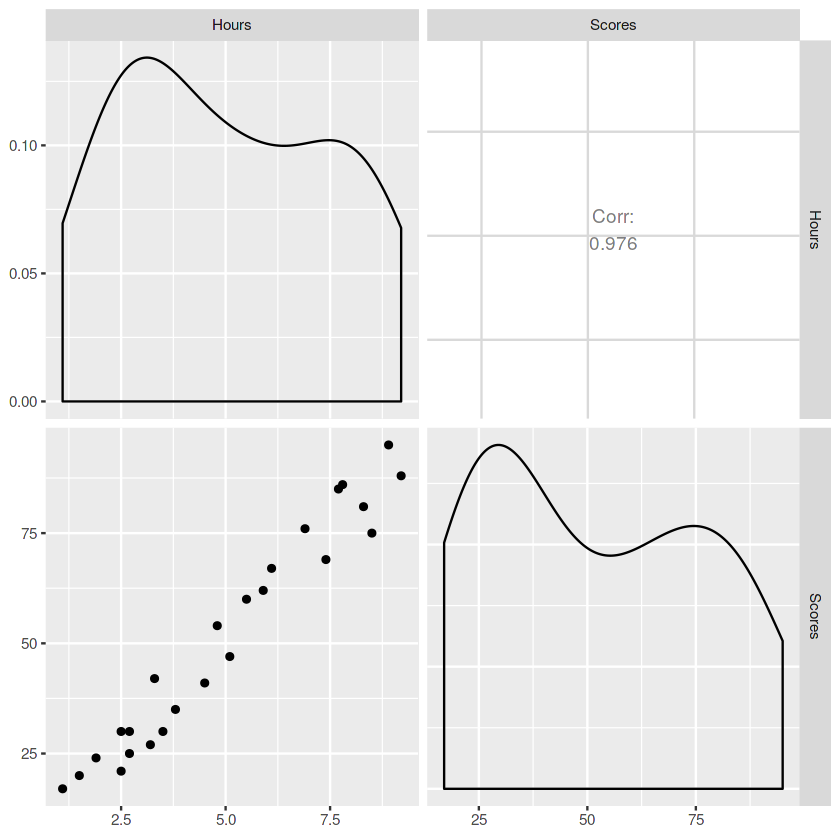

In [28]:
#Using ggpair we come to know how Number of hours is related to Scores
ggpairs(data=df, columns=1:2)

In [29]:
summary(df)

     Hours           Scores     
 Min.   :1.100   Min.   :17.00  
 1st Qu.:2.700   1st Qu.:30.00  
 Median :4.800   Median :47.00  
 Mean   :5.012   Mean   :51.48  
 3rd Qu.:7.400   3rd Qu.:75.00  
 Max.   :9.200   Max.   :95.00  

In [30]:
#We Create Model for Linear Regression
lmm = lm(y~x,data=df)

In [31]:
summary(lmm)
#The model output will provide us with the information we need to test our hypothesis and assess how well the model fits our data.


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.578  -5.340   1.839   4.593   7.265 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4837     2.5317   0.981    0.337    
x             9.7758     0.4529  21.583   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.603 on 23 degrees of freedom
Multiple R-squared:  0.9529,	Adjusted R-squared:  0.9509 
F-statistic: 465.8 on 1 and 23 DF,  p-value: < 2.2e-16


**How well does the model fit the data?**

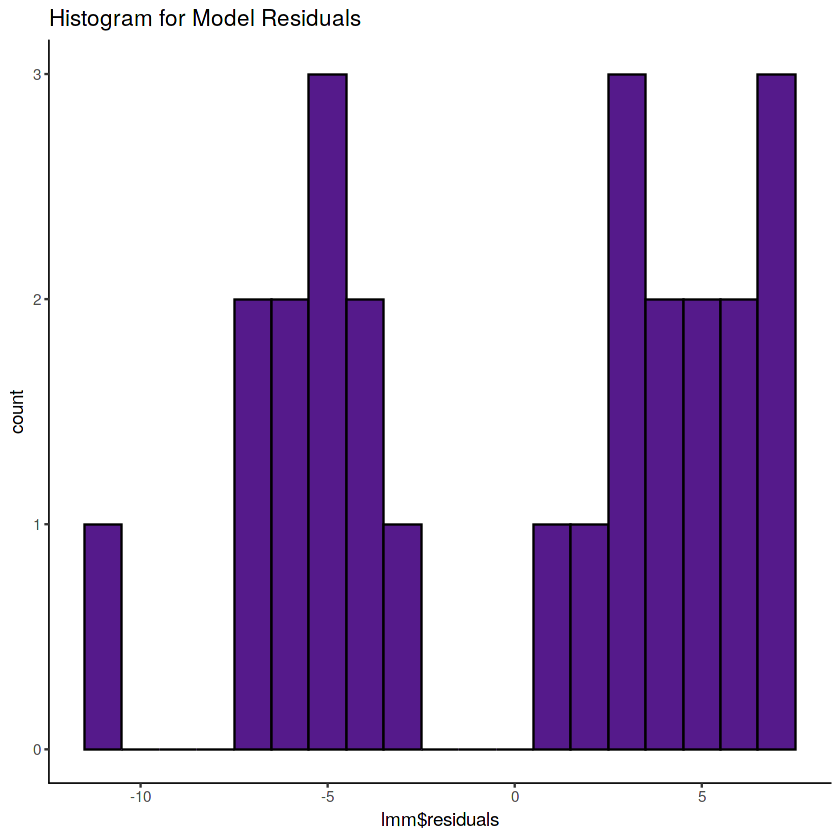

In [32]:
#We plot histogram to determine residual
ggplot(data=df, aes(lmm$residuals)) +
geom_histogram(binwidth = 1, color = "black", fill = "purple4") +
theme(panel.background = element_rect(fill = "white"),
axis.line.x=element_line(),
axis.line.y=element_line()) +
ggtitle("Histogram for Model Residuals")

**Linear Regression**

$x
[1] "Hours"

attr(,"class")
[1] "labels"

$y
[1] "Scores"

attr(,"class")
[1] "labels"

$title
[1] "Linear Model Fitted to Data"

attr(,"class")
[1] "labels"

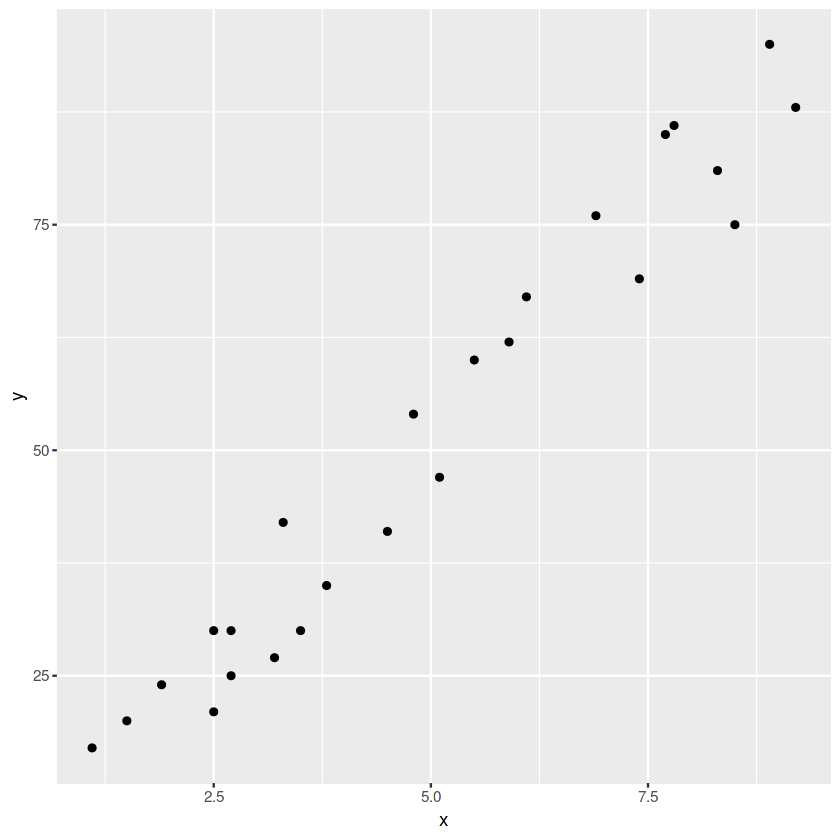

In [42]:
#ploting Scatter Plot to see how data fit
ggp <- ggplot(df,aes(x,y)) +
geom_point()
xlab("Hours")
ylab("Scores")
ggtitle("Linear Model Fitted to Data")
ggp

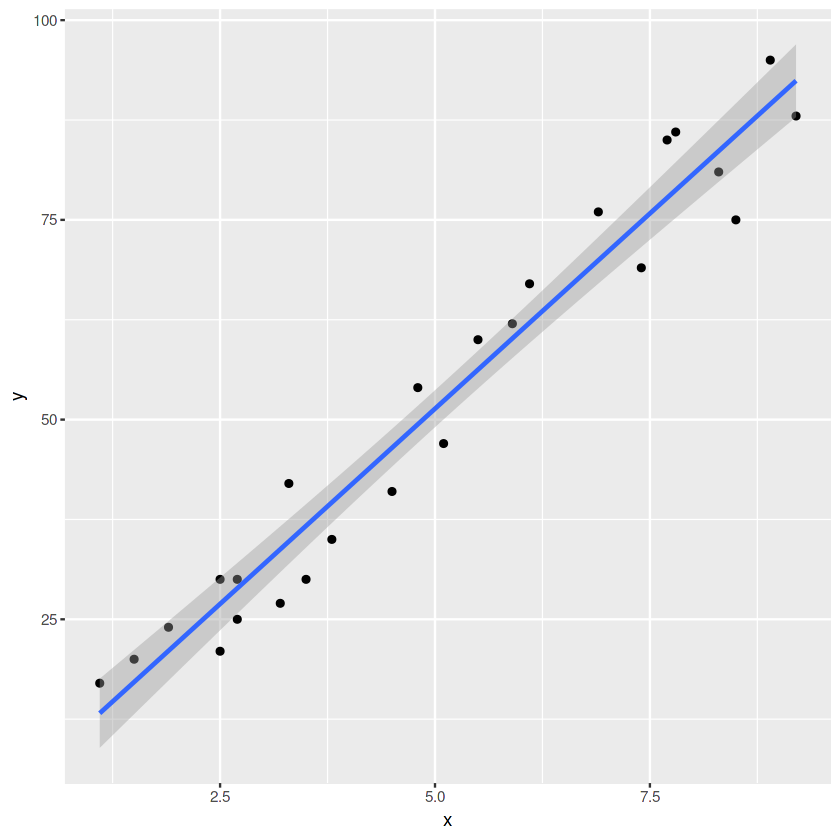

In [43]:
#ploting Regression Line
ggp + geom_smooth(method = "lm",
                formula = y ~ x)

In [73]:
# We Compare Actual vs Predicted
newx <- df$Hours
scorepred = predict(lmm,data.frame(newx))
df1 <- data.frame(x,scorepred,y)
head(df1)               



,x,scorepred,y
,<dbl>,<dbl>,<dbl>
1,2.5,26.92318,21
2,5.1,52.34027,47
3,3.2,33.76624,27
4,8.5,85.57800,75
5,3.5,36.69899,30
6,1.5,17.14738,20


In [54]:
#Predicting Scores when no of hrs studied = 9.25
pr = predict(lmm,data.frame(x=9.25))

In [61]:
cat("If student spend 9.25 hrs on studying then the predicted score =",pr,"%")


If student spend 9.25 hrs on studying then the predicted score = 92.90985 %